###  1) Input dataset and Domain analysis

##### 1.1 Domain analysis - Analysis of the dataset's features
A dataset comprising of few vital parameters(given below) has been given to train and predict the flight fare. 1) Airline - refers to the airline in which the passengers have completed their travel 2) Date_of_Journey - refers to the date of journey in dd/mm/yyyy format 3) Source - refers to the departure city 4) Destination - refers to the destination city 5) Route - refers to the route that the passenger travelled to reach their destination city 6) Dep_Time - refers to the departure time in 24 hour format 7) Arrival_Time - refers to the arrival time in 24 hour format. It includes the day if travel completes the next day 8) Duration - refers to the travel duration in hour and minute 9) Total_Stops - refers to the number of stops 10) Additional_Info - refers to the facilities the passenger availed. Ex: Business class, No check-in luggage included etc., 11) Price - refers to the flight fare(feature to be predicted)

###  1.2 Import the required libraries

In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import datetime
import calendar

import warnings
warnings.filterwarnings("ignore")

###### 1.2 Libraries and their functionalities 
1) Numpy - for statistical calculations like mean, median etc., 
2) Pandas - for dataset processing 
3) Matplotlib and Seaborn - for data visualization 
4) Regex - for handling and parsing the data 
5) datetime and calendar - for handling date parameter 
6) Warnings - to filter warning messages
#

### 1.3 Import the dataset

In [359]:
df = pd.read_csv(r'F:\Project\Data Train.csv')

### 1.4 View Sample Data 

In [360]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


##### 1.4
1) Input dataset has 10683 rows 
2) We have 11 features of which "Price" is the dependent variable 
#

##  2) Exploratory data analysis 

#### 2.1 General information about the dataset

In [361]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [362]:
df.tail(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


#### 2.2 Describe the dataset and it's features

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### NOTE
1) All predictors are of data type "object" 2) The predicted feature is of data type "integer" 3) Predictors "Route" and "Total_Stops" has one null value each

In [364]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

##### NOTE
Name of the Airline Carriers

###### 2.2.1 Key description\statistics of features of datatype integer

In [365]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


##### NOTE
1) All rows have non-zero price 2) Minimum price is Rs.1759/- and the maximum price is Rs.79512/-

##### 2.2.2 Key description\statistics of features of datatype object

In [366]:
#.nunique()
#to know total number of unique values in each column in our dataframe
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [367]:
df.describe(include= "")

TypeError: data type '' not understood

##### 2.2.3 Inference
There are 1) 12 unique Airline providers of which Jet Airways' data has 3849 rows 2) 44 unique date of journeys of which around 504 passengers flew on 18/05/2019 3) 5 unique departure cities of which Delhi has most number of data, around 4537 rows 4) 6 unique destination cities of which Cochin has the most number of data, around 4537 rows 5) 127 unique routes(1 route has null data and is not considered here). Delhi to Cochin via Bombay(route DEL --> BOM --> COK) is the most frequently used, around 2376 times 6) 222 unique departure timings and 1343 arrival timings 7) 368 unique durations of travel available of which the most frequent duration is 2h 50m 8) 4 unique total stops(1 total stop has null data and is not considered here). Around 5625 rows of direct flight data available 9) 10 unique additional info. Around 8345 rows does not have these details captured

### 2.3 Check for duplicate data

In [368]:
df.duplicated().sum()

220

##### 2.3.1 Inference
1) There are 220 duplicate rows available. They should be removed in the data pre-processing step

In [369]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### 2.4 Data visualization and analysis

#### 2.4.1.1 Top 5 Airline by count

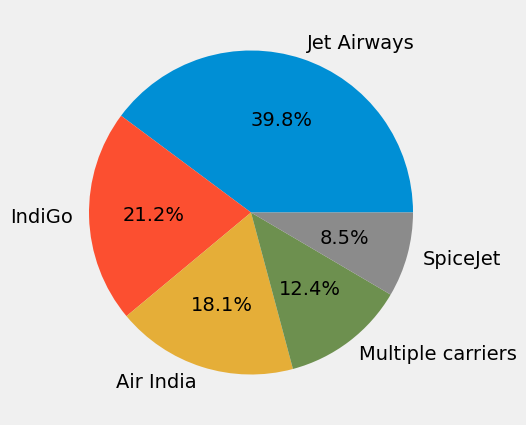

In [86]:
df_airline_group = df.groupby(df["Airline"]).count()
df_airline_group_sorted = df_airline_group.sort_values(by=["Source"], ascending=False)
df_airline_group_sorted

df_airline_label = []
for airline in df_airline_group_sorted.head(5).index:
    df_airline_label.append(airline)

plt.figure(figsize=(5,5))
plt.pie(df_airline_group_sorted["Source"].head(5), labels=df_airline_label,  autopct="%.1f%%")
plt.show()

#### 2.4.1.2 Inference
1) Jet Airways tops the list with most number of flights operated followed by IndiGo, Air India, Multiple carriers(other airlines) and SpiceJet

####  2.4.1.3 Top Departure cities by journey

In [87]:
city = df["Source"].value_counts()
city

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

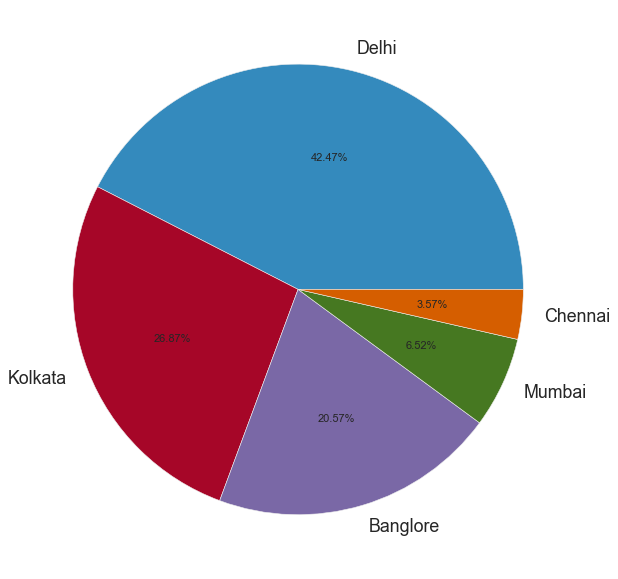

In [144]:
#plt.style.use('bmh')  ## 'seaborn-muted', 'bmh','seaborn-paper', 'seaborn-talk' , 'seaborn-bright', 'seaborn-darkgrid', 'seaborn-ticks', 'seaborn'
plt.pie(city.values,labels=city.index,autopct="%1.2f%%")
plt.show()

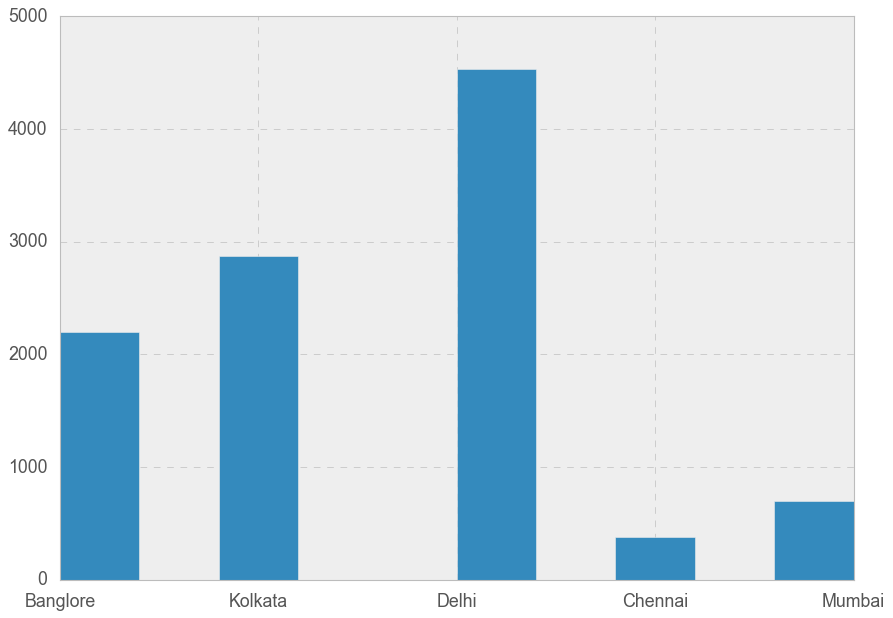

In [145]:
plt.hist(df["Source"])
plt.show()

##### 2.4.1.3 Inference
1) More number of flights were operated from Delhi followed by Kolkata, Bangalore, Mumbai and Chennai

##### 2.4.1.4 Top destination cities by journey

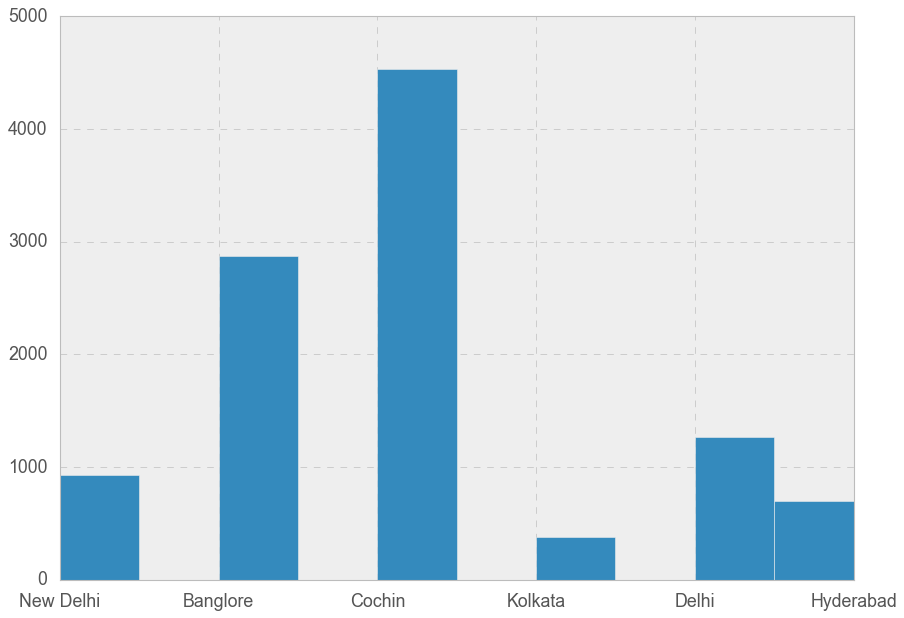

In [146]:
plt.hist(df["Destination"], )
plt.show()

In [147]:
Destcity = df["Destination"].value_counts()
Destcity

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

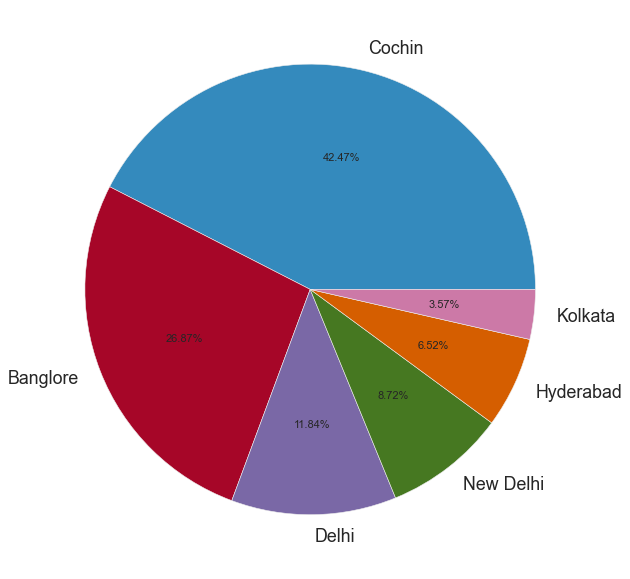

In [148]:
plt.pie(Destcity.values,labels=Destcity.index,autopct="%1.2f%%")
plt.show()

#### 2.4.1.4 Inference
1) More number of flights had their destination city as Cochin followed by Bangalore, Delhi, New Delhi, Hyderabad and Kolkata

#### 2.4.1.5 Top 5 flight routes by number of journey

In [149]:
df_route_group = df.groupby(df["Route"]).count()
df_route_group_sorted = df_route_group.sort_values(by=["Source"], ascending=False)
df_route_group_sorted.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Route,,,,,,,,,,
DEL → BOM → COK,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376
BLR → DEL,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552
CCU → BOM → BLR,979,979,979,979,979,979,979,979,979,979
CCU → BLR,724,724,724,724,724,724,724,724,724,724
BOM → HYD,621,621,621,621,621,621,621,621,621,621


#### 2.4.1.5 Inference
1) Top 5 routes that had the most number of journeys are given below in the order:

DEL → BOM → COK

BLR → DEL

CCU → BOM → BLR

CCU → BLR

BOM → HYD

#### 2.4.1.6 Ticket Prices according to the no of stopages in between 

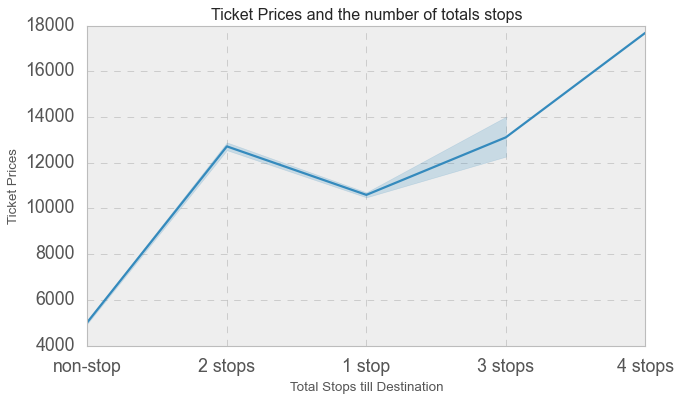

In [150]:
plt.figure(figsize=(9, 5))
sns.lineplot(x='Total_Stops', y='Price', data=df)
plt.title('Ticket Prices and the number of totals stops')
plt.xlabel('Total Stops till Destination')
plt.ylabel('Ticket Prices')
plt.show()

#### 2.4.1.7 Distribution of Flight Ticket Prices

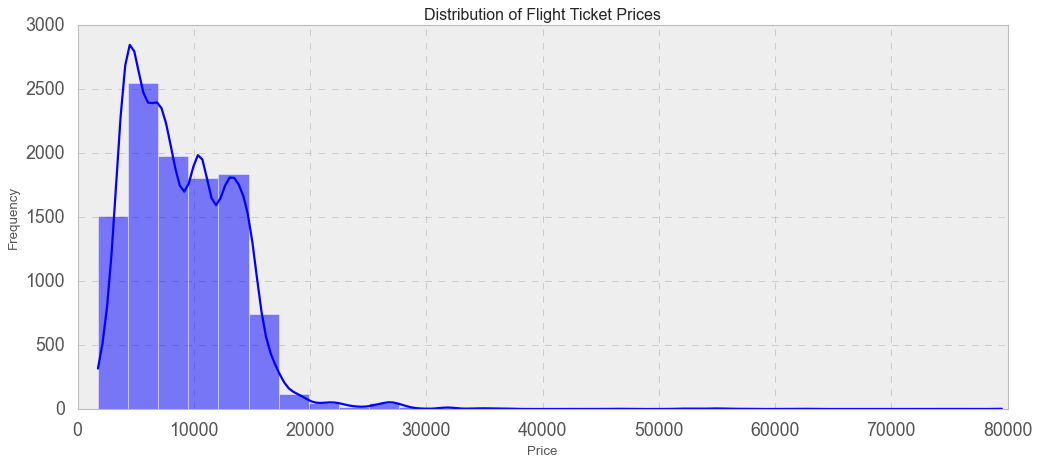

Mean Price: 9087.064120565385
Median Price: 8372.0
Standard Deviation of Price: 4611.35916681709
Minimum Price: 1759
Maximum Price: 79512


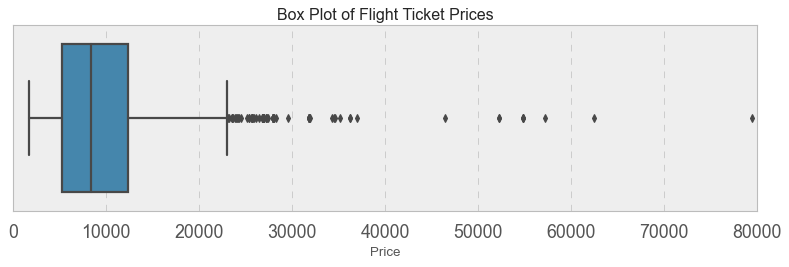

In [172]:
# Create a histogram
plt.figure(figsize=(15, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Flight Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Calculate summary statistics
price_mean = df['Price'].mean()
price_median = df['Price'].median()
price_std = df['Price'].std()
price_min = df['Price'].min()
price_max = df['Price'].max()

print(f"Mean Price: {price_mean}")
print(f"Median Price: {price_median}")
print(f"Standard Deviation of Price: {price_std}")
print(f"Minimum Price: {price_min}")
print(f"Maximum Price: {price_max}")

# Create a box plot
plt.figure(figsize=(12, 2.9))
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Flight Ticket Prices')
plt.xlabel('Price')
plt.show()


#### 2.4.1.8  Comapring Airline Prices to see who charges the most

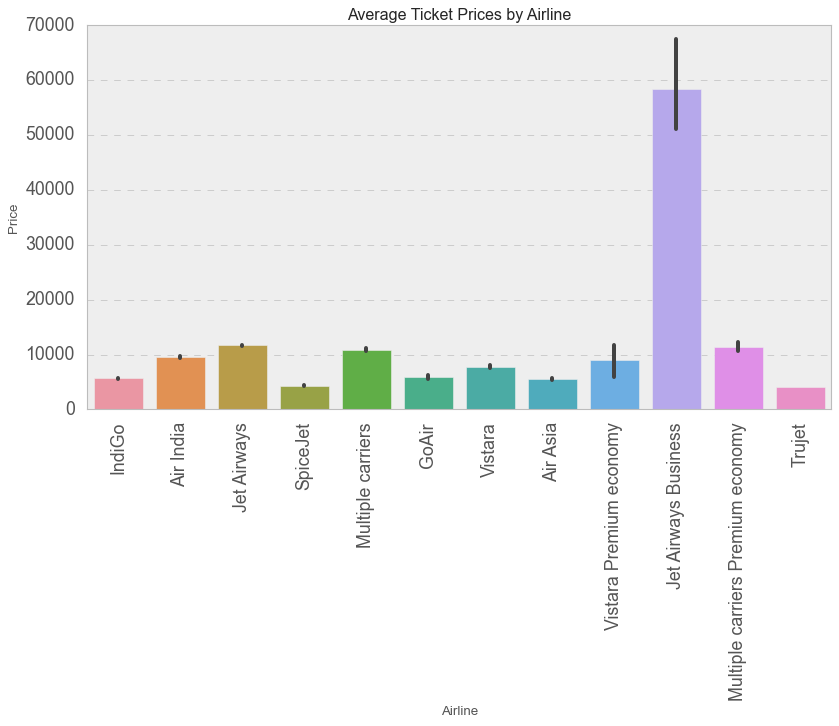

In [186]:
#Create a bar plot to compare airline prices
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='Price', data=df)
plt.title('Average Ticket Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#### 2.4.1.9 Comapring Airline Prices based on the Duration of the Flight

In [246]:
df["Duration"].value_counts()

0 days 02:50:00    550
0 days 01:30:00    386
0 days 02:45:00    337
0 days 02:55:00    337
0 days 02:35:00    329
                  ... 
1 days 07:30:00      1
1 days 06:25:00      1
1 days 18:05:00      1
0 days 04:10:00      1
1 days 23:40:00      1
Name: Duration, Length: 368, dtype: int64

 ####  2.4.1.10 Changing the Duration from Hours to Minutes

In [334]:
df['Time Taken'] = (pd.to_timedelta(df['Duration']).dt.seconds // 60).astype(str) + 'm'
df
#  Col_name    new   new1 timedelta
#0   2h 50m   170m   170m  02:50:00
#1   8h 35m   515m   515m  08:35:00
#2      19h  1140m  1140m  19:00:00

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Time Taken
0,IndiGo,Sunday,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0 days 02:50:00,0,No info,3897,170m
1,Air India,Wednesday,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,0 days 07:25:00,2,No info,7662,445m
2,Jet Airways,Sunday,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,0 days 19:00:00,2,No info,13882,1140m
3,IndiGo,Sunday,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,0 days 05:25:00,1,No info,6218,325m
4,IndiGo,Friday,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,0 days 04:45:00,1,No info,13302,285m
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Tuesday,Kolkata,Banglore,CCU → BLR,19:55,22:25,0 days 02:30:00,0,No info,4107,150m
10679,Air India,Saturday,Kolkata,Banglore,CCU → BLR,20:45,23:20,0 days 02:35:00,0,No info,4145,155m
10680,Jet Airways,Saturday,Banglore,Delhi,BLR → DEL,08:20,11:20,0 days 03:00:00,0,No info,7229,180m
10681,Vistara,Friday,Banglore,New Delhi,BLR → DEL,11:30,14:10,0 days 02:40:00,0,No info,12648,160m


In [335]:
df["Time Taken"].value_counts()

170m     569
90m      407
175m     381
155m     368
165m     341
        ... 
1030m      2
1085m      1
210m       1
1190m      1
815m       1
Name: Time Taken, Length: 284, dtype: int64

#### 2.4.1.11 Time Taken vs Price of the Flight

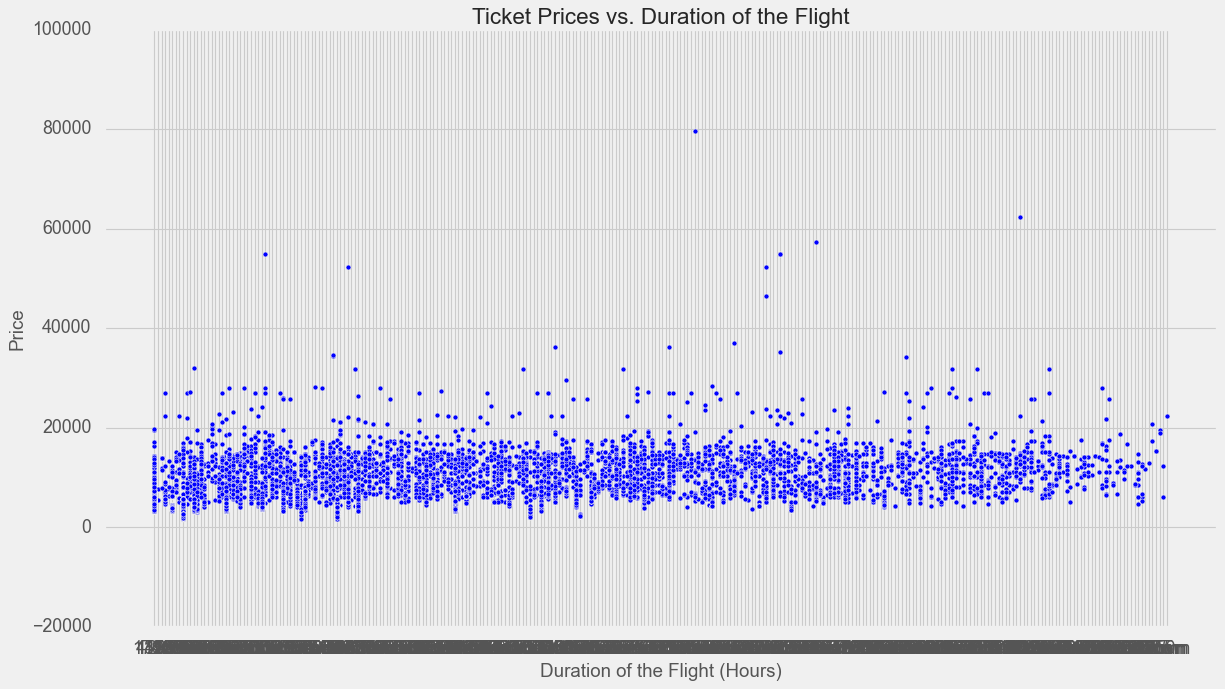

In [336]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,9))
plt.scatter(df["Time Taken"],df["Price"])

plt.title('Ticket Prices vs. Duration of the Flight')
plt.xlabel('Duration of the Flight (Hours)')
plt.ylabel('Price')
plt.show()

#### 2.4.1.12 Duration Vs Price 

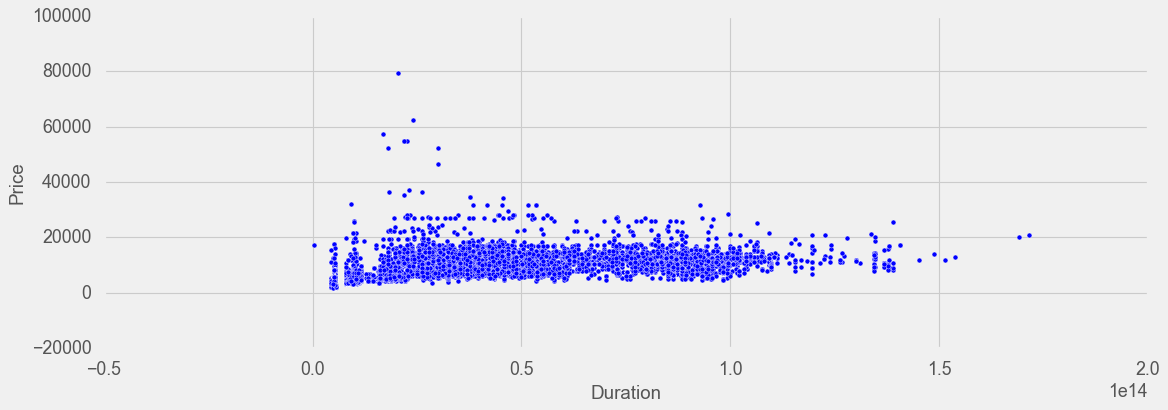

In [337]:
#df["Time Taken"] = df["Time Taken"].apply(dur_conv)
#df["Duration"] = df["Duration"].apply(dur_conv)
plt.figure(figsize=(15,5))
sns.scatterplot(x="Duration", y="Price", data=df)
plt.show()

#### 2.4.1.12 Inference
1) Flights with duration more than 1750 minutes(29 hours) usually charge high airfare. Their average airfare starts from Rs.7500/- whereas flights with duration lesser than 1750 minutes(29 hours) have their average airface starting from lesser than Rs.7500/- 2) Occassional journeys with lesser duration were charged unusually high airfare like Rs.80,000/-, Rs.60,000/- etc.,

### 2.4.2.13 Additional info vs Price

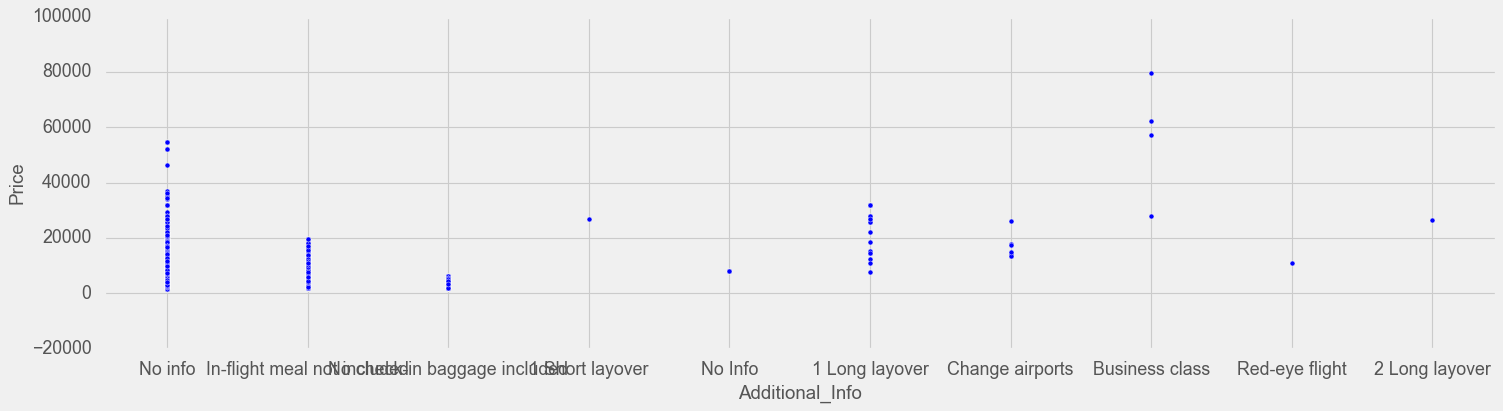

In [338]:
plt.figure(figsize=(20,5))
sns.scatterplot(x="Additional_Info", y="Price", data=df)
plt.show()

### 2.4.2.13 Inference
1) Business class journeys have the highest fare charged. Their average airfare starts from around Rs.30,000/- 2) Travellers that need to change airports are charged relatively a higher airfare when compared with others

### 2.4.2.14 Changing the Date of Journey to Name of the Day

In [339]:
def date_jour_day(date):
    day = datetime.datetime.strptime(date, '%d/%m/%Y').weekday()
    return (calendar.day_name[day])

#df["Date_of_Journey"] = df["Date_of_Journey"].apply(date_jour_day)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Time Taken
0,IndiGo,Sunday,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0 days 02:50:00,0,No info,3897,170m
1,Air India,Wednesday,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,0 days 07:25:00,2,No info,7662,445m
2,Jet Airways,Sunday,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,0 days 19:00:00,2,No info,13882,1140m
3,IndiGo,Sunday,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,0 days 05:25:00,1,No info,6218,325m
4,IndiGo,Friday,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,0 days 04:45:00,1,No info,13302,285m


#### 2.4.2.15 Date of Journey VS Price

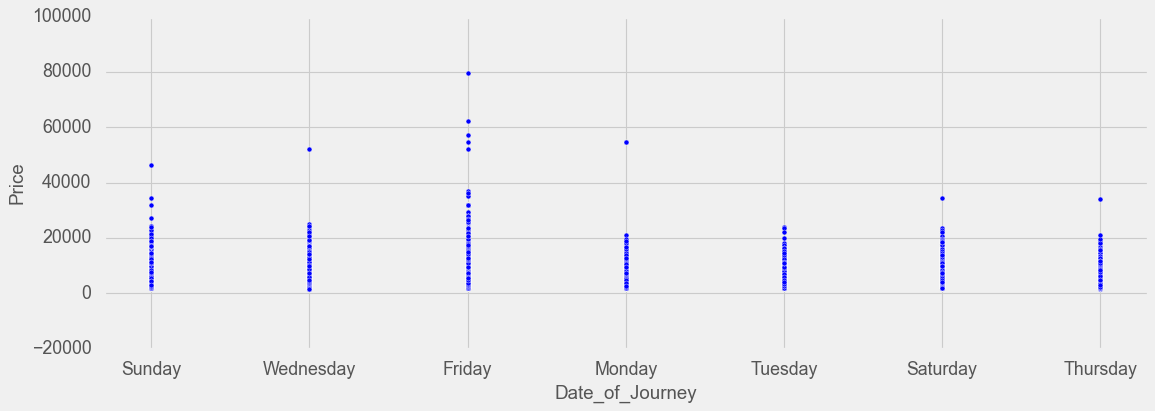

In [340]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Date_of_Journey", y="Price", data=df)
plt.show()

####  2.4.2.15 Inference
1) Flight fare is high during Friday followed by Sunday 2) There are occasional high flight fares during Monday, Wednesday, Thursday and Thursday 3) Flight fare is normal during Tuesday

## 3) Data pre-processing

### 3.1 Convert Total_Stops from "Categorical" to "Numerical"

In [341]:
def stop_conv(stop):
    if stop == "non stop":
        stop == 0 
    elif stop == "1 stop":
        stop = 1
    elif stop == "2 stops":
        stop = 2
    elif stop == "3 stops":
        stop = 3
    elif stop == "4 stops":
        stop = 4
    else:
        stop = 0
    return stop

In [342]:
df["Total_Stops"] = df["Total_Stops"].apply(stop_conv)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Time Taken
0,IndiGo,Sunday,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0 days 02:50:00,0,No info,3897,170m
1,Air India,Wednesday,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,0 days 07:25:00,0,No info,7662,445m
2,Jet Airways,Sunday,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,0 days 19:00:00,0,No info,13882,1140m
3,IndiGo,Sunday,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,0 days 05:25:00,0,No info,6218,325m
4,IndiGo,Friday,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,0 days 04:45:00,0,No info,13302,285m
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Tuesday,Kolkata,Banglore,CCU → BLR,19:55,22:25,0 days 02:30:00,0,No info,4107,150m
10679,Air India,Saturday,Kolkata,Banglore,CCU → BLR,20:45,23:20,0 days 02:35:00,0,No info,4145,155m
10680,Jet Airways,Saturday,Banglore,Delhi,BLR → DEL,08:20,11:20,0 days 03:00:00,0,No info,7229,180m
10681,Vistara,Friday,Banglore,New Delhi,BLR → DEL,11:30,14:10,0 days 02:40:00,0,No info,12648,160m


In [343]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Time Taken         0
dtype: int64

In [344]:
df[df.duplicated()].sum()

Airline            IndiGoMultiple carriersVistaraJet AirwaysIndiG...
Date_of_Journey    MondayMondayThursdayWednesdaySaturdayWednesday...
Source             BangloreDelhiBangloreKolkataBangloreKolkataBan...
Destination        DelhiCochinDelhiBangloreDelhiBangloreDelhiCoch...
Route              BLR → DELDEL → BOM → COKBLR → DELCCU → BOM → B...
Dep_Time           04:0008:4517:0008:2504:0010:2011:1014:3507:101...
Arrival_Time       06:5019:0019:3520:4506:5012:5513:5504:25 02 Ju...
Duration                                           422 days 06:30:00
Total_Stops                                                        0
Additional_Info    No infoNo infoNo infoNo infoNo infoNo infoNo i...
Price                                                       10432780
Time Taken         170m615m155m740m170m155m165m830m180m150m455m17...
dtype: object

In [348]:
df.describe(include = 'O').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10683,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Additional_Info,10683,10,No info,8345
Time Taken,10683,284,170m,569


In [345]:
df = df.set_index("Date_of_Journey")

In [346]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Time Taken
Date_of_Journey,,,,,,,,,,,
Sunday,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0 days 02:50:00,0,No info,3897,170m
Wednesday,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,0 days 07:25:00,0,No info,7662,445m
Sunday,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,0 days 19:00:00,0,No info,13882,1140m
Sunday,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,0 days 05:25:00,0,No info,6218,325m
Friday,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,0 days 04:45:00,0,No info,13302,285m


In [347]:
beldel_df = df[ df['Route'] == 'BLR → DEL']
beldel_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Time Taken
Date_of_Journey,,,,,,,,,,,
Sunday,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0 days 02:50:00,0,No info,3897,170m
Wednesday,IndiGo,Banglore,Delhi,BLR → DEL,04:00,06:50,0 days 02:50:00,0,No info,3943,170m
Wednesday,IndiGo,Banglore,Delhi,BLR → DEL,18:55,21:50,0 days 02:55:00,0,No info,4823,175m
Tuesday,Vistara,Banglore,Delhi,BLR → DEL,09:45,12:35,0 days 02:50:00,0,No info,4668,170m
Saturday,IndiGo,Banglore,Delhi,BLR → DEL,04:00,06:50,0 days 02:50:00,0,No info,4423,170m
...,...,...,...,...,...,...,...,...,...,...,...
Thursday,Vistara,Banglore,New Delhi,BLR → DEL,21:10,00:05 19 Mar,0 days 02:55:00,0,No info,4878,175m
Tuesday,IndiGo,Banglore,Delhi,BLR → DEL,18:55,21:50,0 days 02:55:00,0,No info,4823,175m
Tuesday,SpiceJet,Banglore,Delhi,BLR → DEL,05:55,08:35,0 days 02:40:00,0,No check-in baggage included,3257,160m


In [164]:
#beldel_df[ beldel['Total_Stops'] == '1 stops']